Binary Classification Project

In [1]:
import pandas as pds

file = ('creditcard_2013.csv')

df =  pds.read_csv(file)

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Check for null values and duplicate values:

In [2]:
df_null_count = df.isnull().sum()
df_duplicate_count = df.duplicated().sum()

if df_null_count.sum() == 0:
    print("No null values in the dataset")
else:
    print("There are this many null values: " + str(df_null_count))

if df_duplicate_count == 0:
    print("No duplicate values in the dataset")
else:
    print("There are this many duplicate values: " + str(df_duplicate_count))

No null values in the dataset
There are this many duplicate values: 1081


Since there are duplicate values in the dataset, we will need to drop the duplicate entries first.

In [3]:
df = df.drop_duplicates()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Need to remove features with low variance or no variance because they will not contribute much to the model and could cause overfitting if left in the dataset.

In [4]:
# Calculate the variance of each feature excluding the Class feature
variances = df.drop(columns=['Class']).var()

# Sort the features by variance in ascending order
sorted_variances = variances.sort_values()
print(sorted_variances)

# Set the threshold to 0.1
threshold = 0.01

# Get the low variance features
low_variance_features = variances[variances < threshold].index

# Drop the low variance features
df = df.drop(columns=low_variance_features)
df


V28       1.076015e-01
V27       1.566132e-01
V26       2.323750e-01
V25       2.716706e-01
V24       3.667837e-01
V23       3.890047e-01
V21       5.240448e-01
V22       5.249734e-01
V20       5.928757e-01
V19       6.615847e-01
V18       7.012011e-01
V17       7.098186e-01
V16       7.633453e-01
V15       8.370304e-01
V14       9.067136e-01
V12       9.893773e-01
V13       9.908802e-01
V11       1.037791e+00
V10       1.158653e+00
V9        1.200104e+00
V8        1.390169e+00
V7        1.507159e+00
V6        1.774039e+00
V5        1.896152e+00
V4        1.999916e+00
V3        2.276121e+00
V2        2.711631e+00
V1        3.794806e+00
Amount    6.269988e+04
Time      2.254450e+09
dtype: float64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Since all of the variances are above the threshold, we will use correlation analysis next to remove columns that are tightly correlated with another column.

In [5]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Identify highly correlated features
highly_correlated = set()
threshold = 0.7
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)

# Remove highly correlated features
print(highly_correlated)
highly_correlated.discard('Class')
print(highly_correlated)
df_reduced = df.drop(columns=highly_correlated)
df_reduced

set()
set()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


There were no columns that are tightly correlated with another.

We can also reduce the number of features by removing quasi-constant features, which is a column that has 99% of the same data from column to column.

In [6]:
label_counts = df_reduced['Class'].value_counts()

print(label_counts)

Class
0    283253
1       473
Name: count, dtype: int64


There is an imbalanced distribution of Class 1 and Class 0, so we will need to perform oversampling and undersampling.

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
import pandas as pd

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Class distribution of training data before resampling:")
print(y_train.value_counts())

# Apply SMOTEENN to training data
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

print("Class distribution of training data after resampling:")
print(pd.Series(y_train_resampled.value_counts()))


Class distribution of training data before resampling:
Class
0    226597
1       383
Name: count, dtype: int64
Class distribution of training data after resampling:
Class
1    217858
0    209296
Name: count, dtype: int64


Decision Tree:

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
Test Accuracy with Best Parameters: 0.9978324463398301
Cross-Validation Scores: [0.99820206 0.99818099 0.99852512]
Mean CV Score: 0.9983027203828007
Confusion Matrix:
 [[56558    98]
 [   25    65]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9983    0.9989     56656
           1     0.3988    0.7222    0.5138        90

    accuracy                         0.9978     56746
   macro avg     0.6992    0.8602    0.7564     56746
weighted avg     0.9986    0.9978    0.9981     56746



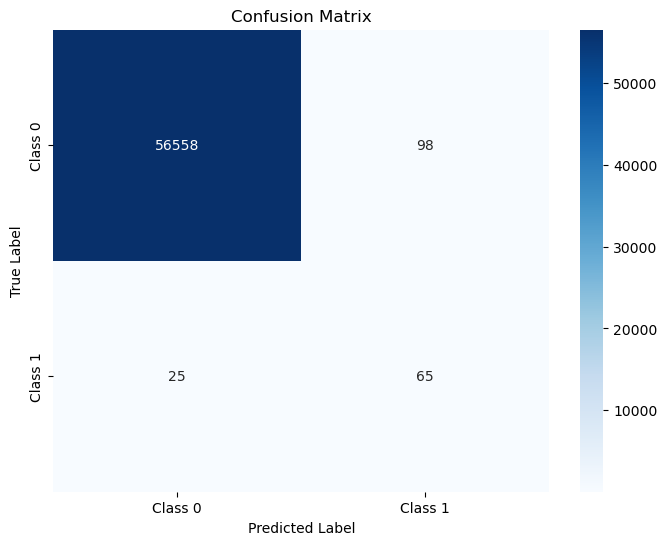

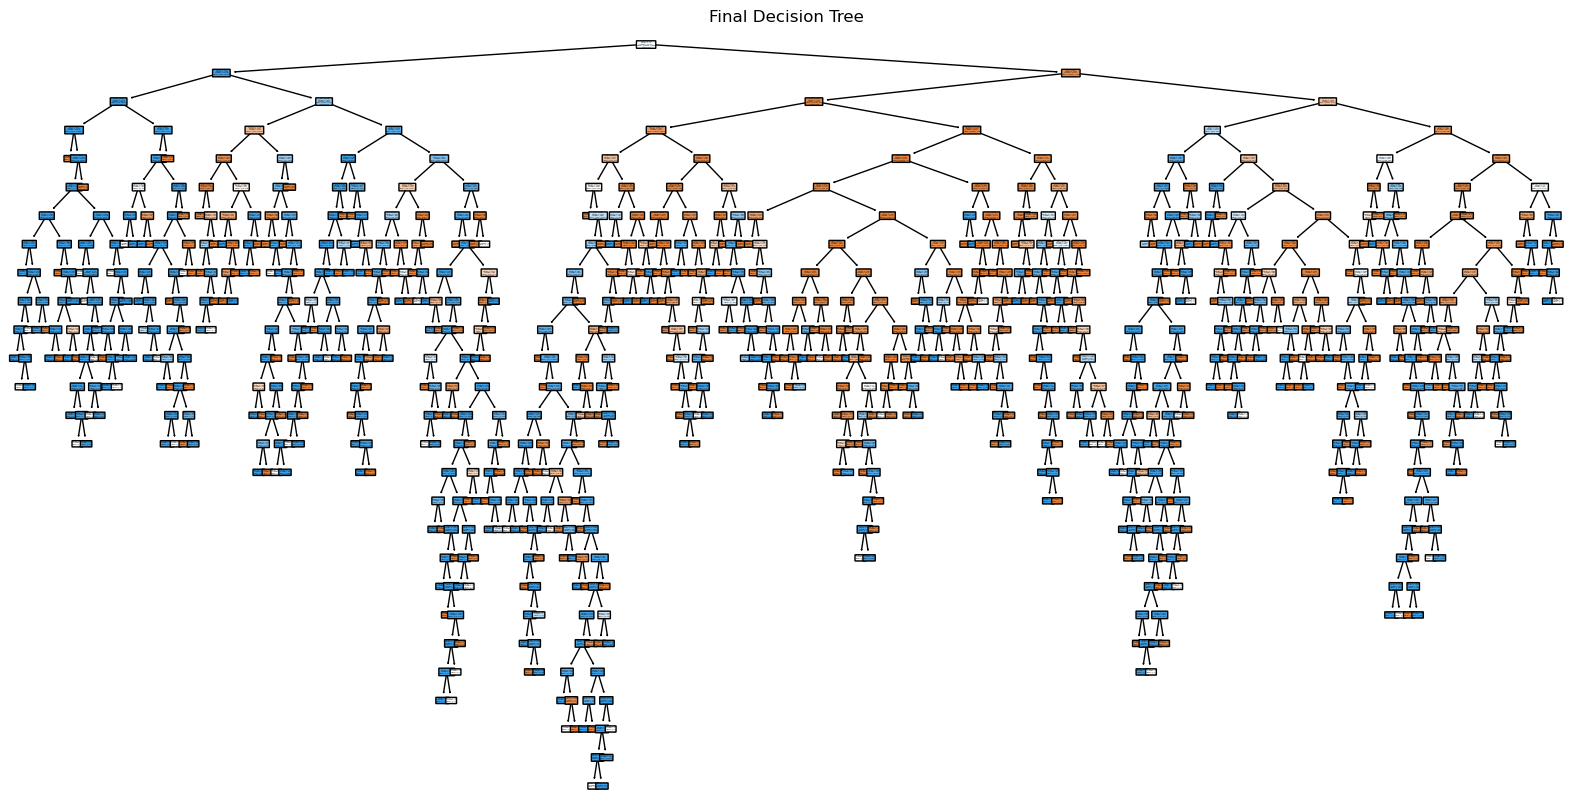

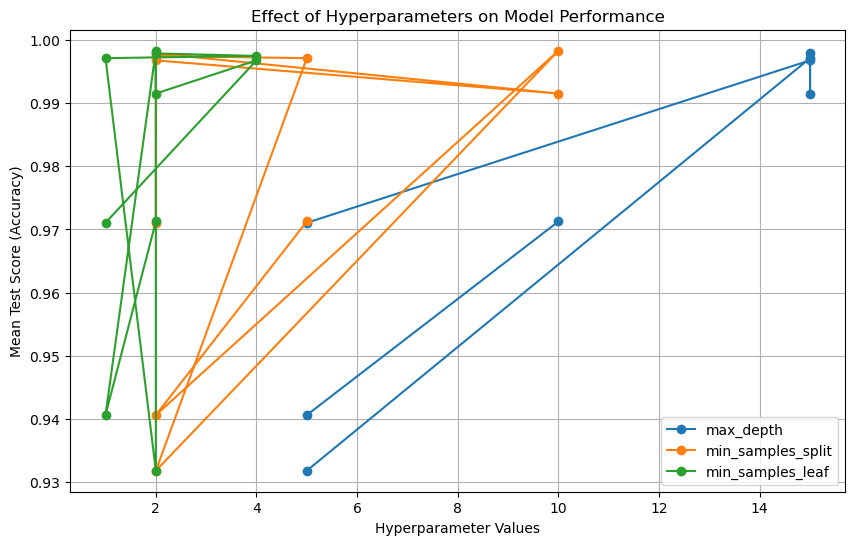

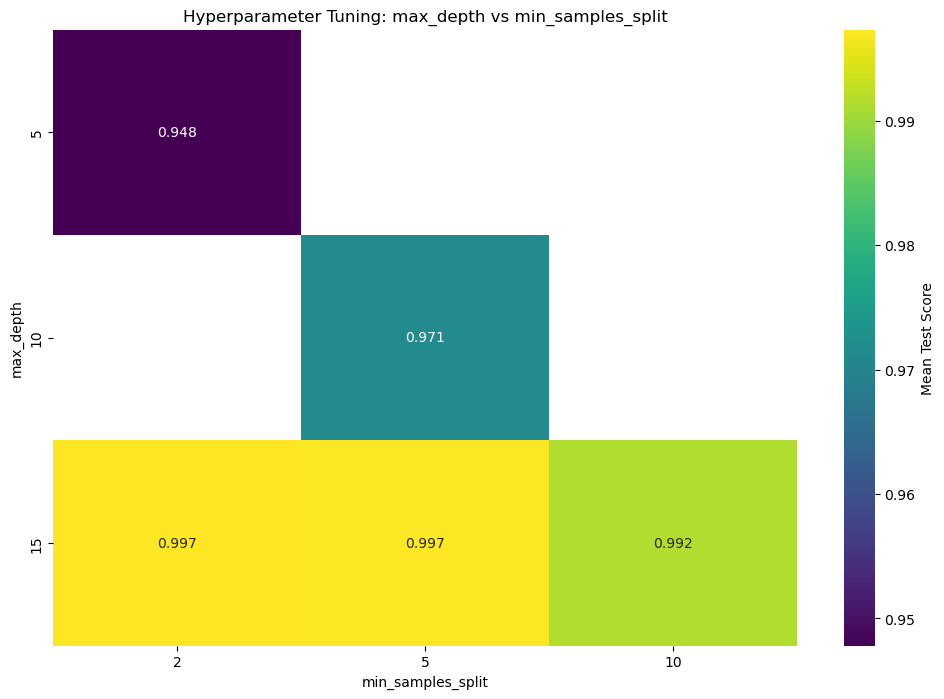

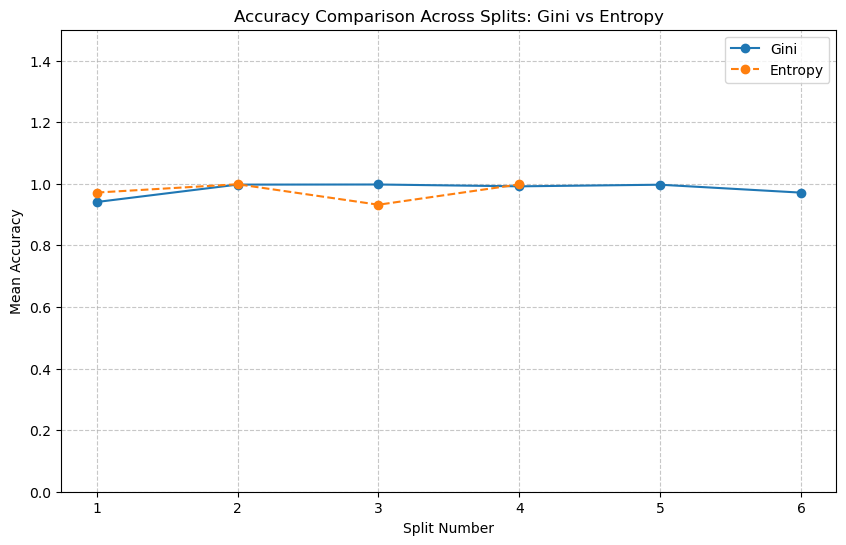

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the Decision Tree model
d_tree = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_distributions = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 5, 10, 15],    # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples per leaf node
    'splitter': ['best', 'random']    # Split strategy
}

# Use RandomizedSearchCV instead of GridSearchCV for faster results
randomized_search = RandomizedSearchCV(
    estimator=d_tree, 
    param_distributions=param_distributions, 
    n_iter=10,  # Number of random combinations to try
    cv=3,       # Use 3-fold cross-validation for faster results
    scoring='accuracy', 
    n_jobs=-1,  # Utilize all CPU cores for parallel processing
    random_state=42, 
    verbose=1   # Display progress during search
)

# Fit the randomized search to the training data
randomized_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
best_params = randomized_search.best_params_
best_d_tree = randomized_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_d_tree.predict(X_test)
accuracy = best_d_tree.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", accuracy)

# Cross-validation score with the best model
cv_scores = cross_val_score(best_d_tree, X_train_resampled, y_train_resampled, cv=3)  # Use 3-fold for faster computation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Visualize the final decision tree
plt.figure(figsize=(20, 10))  # Set figure size for readability
tree.plot_tree(best_d_tree, filled=True, feature_names=X_train_resampled.columns, class_names=True, rounded=True)
plt.title("Final Decision Tree")
plt.show()

# --- Visualizing Hyperparameter Impact ---
# Extract the results from RandomizedSearchCV
results = pd.DataFrame(randomized_search.cv_results_)

# Visualize the effect of different parameters on the mean test score
plt.figure(figsize=(10, 6))

# Plot max_depth vs mean_test_score
if 'param_max_depth' in results:
    plt.plot(results['param_max_depth'], results['mean_test_score'], marker="o", label='max_depth')

# Plot min_samples_split vs mean_test_score
if 'param_min_samples_split' in results:
    plt.plot(results['param_min_samples_split'], results['mean_test_score'], marker="o", label='min_samples_split')

# Plot min_samples_leaf vs mean_test_score
if 'param_min_samples_leaf' in results:
    plt.plot(results['param_min_samples_leaf'], results['mean_test_score'], marker="o", label='min_samples_leaf')

# Customize the plot
plt.xlabel("Hyperparameter Values")
plt.ylabel("Mean Test Score (Accuracy)")
plt.title("Effect of Hyperparameters on Model Performance")
plt.legend()
plt.grid(True)
plt.show()

# --- Heatmap for Parameter Interaction ---
# Pivot the results to create a heatmap of max_depth vs min_samples_split
if 'param_max_depth' in results and 'param_min_samples_split' in results:
    heatmap_data = results.pivot_table(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
    plt.title("Hyperparameter Tuning: max_depth vs min_samples_split")
    plt.xlabel("min_samples_split")
    plt.ylabel("max_depth")
    plt.show()

# Extract results from RandomizedSearchCV
results = pd.DataFrame(randomized_search.cv_results_)

# Filter results for gini and entropy
gini_results = results[results['param_criterion'] == 'gini']
entropy_results = results[results['param_criterion'] == 'entropy']

# Extract mean_test_score for each split
gini_accuracies = gini_results['mean_test_score'].values
entropy_accuracies = entropy_results['mean_test_score'].values

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(gini_accuracies) + 1), gini_accuracies, marker='o', label='Gini', linestyle='-')
plt.plot(range(1, len(entropy_accuracies) + 1), entropy_accuracies, marker='o', label='Entropy', linestyle='--')

# Add labels, title, and legend
plt.title("Accuracy Comparison Across Splits: Gini vs Entropy")
plt.xlabel("Split Number")
plt.ylabel("Mean Accuracy")
plt.ylim(0, 1.5)
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()




k-Nearest Neighbors:

Accuracy: 0.8461389349029006
Accuracy: 0.9543051492616219


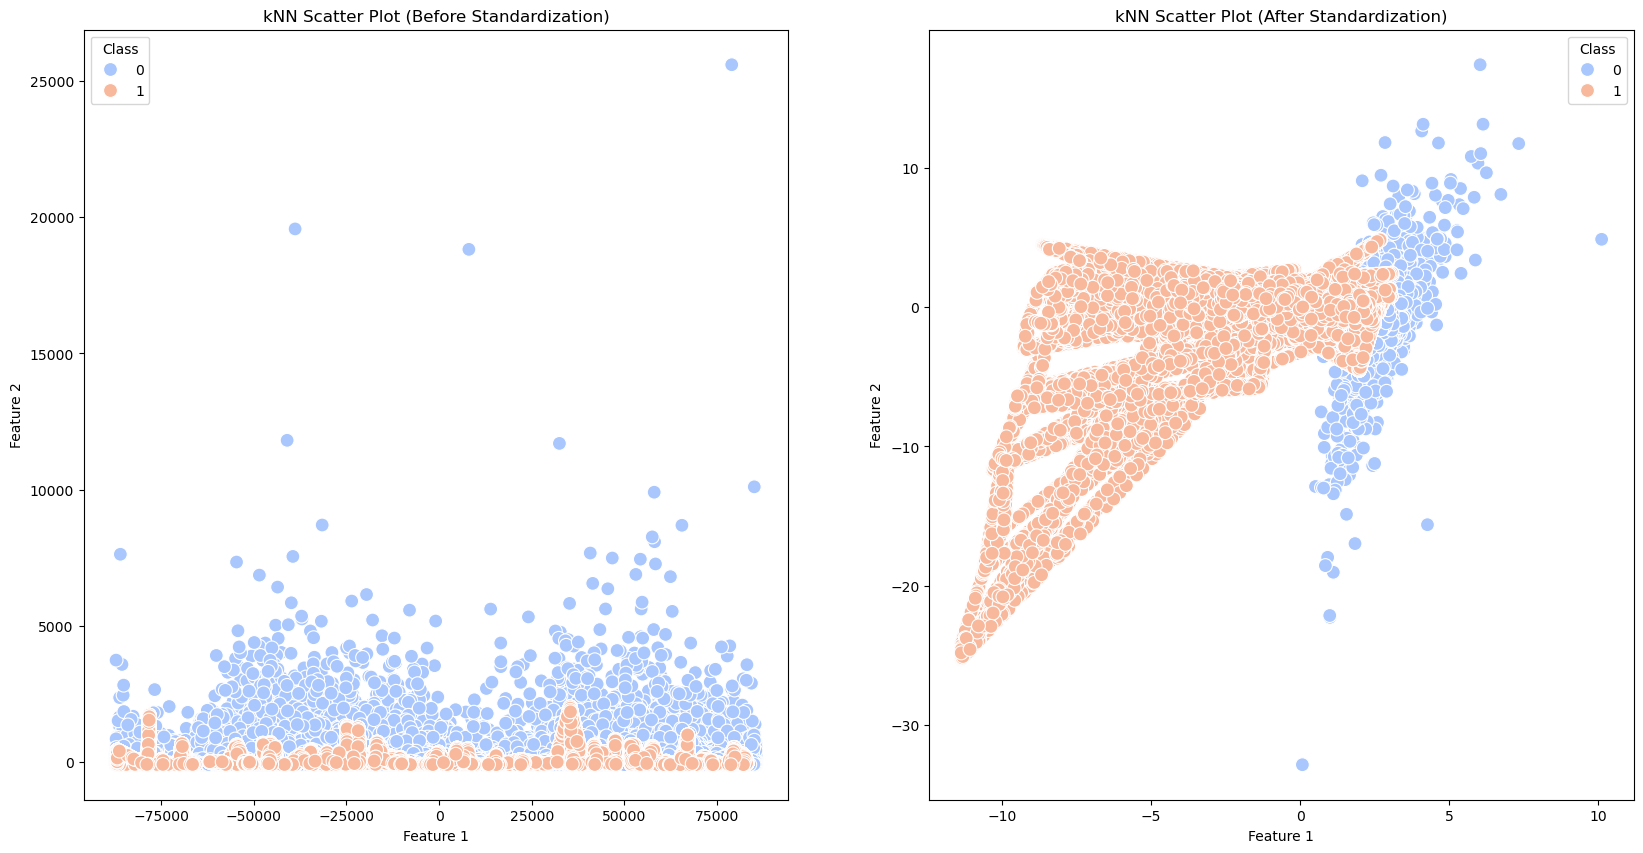

Confusion Matrix:
 [[54081  2575]
 [   18    72]]


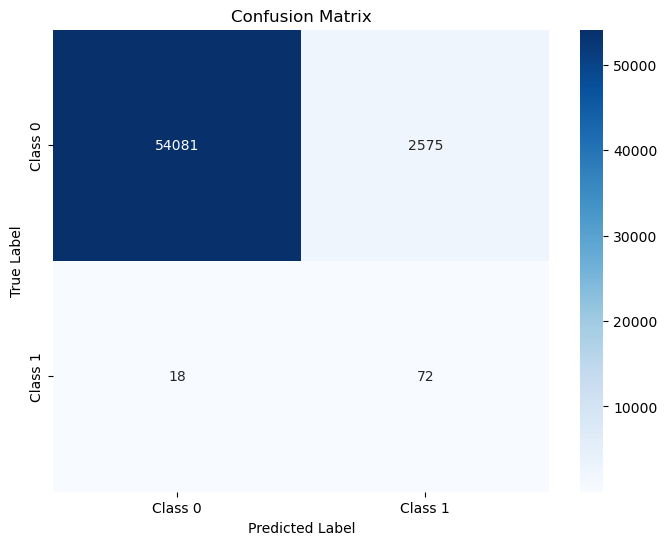

Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9546    0.9766     56656
           1     0.0272    0.8000    0.0526        90

    accuracy                         0.9543     56746
   macro avg     0.5134    0.8773    0.5146     56746
weighted avg     0.9981    0.9543    0.9751     56746

Best k value for euclidean metric: 6
Max Accuracy for euclidean metric: 0.9497534824051606
Best k value for manhattan metric: 6
Max Accuracy for manhattan metric: 0.9501350774837976
Best k value for minkowski metric: 6
Max Accuracy for minkowski metric: 0.9496738870470554


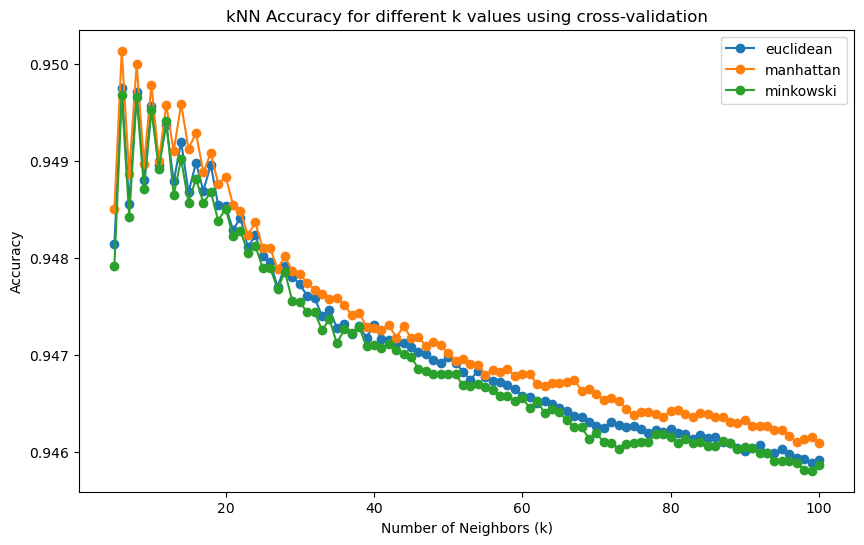

In [9]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed

# Perform dimensionality reduction
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_resampled)
X_test_reduced = pca.transform(X_test) # Avoid fitting on the test data

# Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_reduced, y_train_resampled)

# Make predictions and evaluate
y_pred = knn.predict(X_test_reduced)
accuracy = knn.score(X_test_reduced, y_test)
print("Accuracy:", accuracy)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Scatter Plot
sns.scatterplot(x=X_train_reduced[:, 0], y=X_train_reduced[:, 1], hue=y_train_resampled, palette='coolwarm', s=100, ax=axes[0])
axes[0].set_title('kNN Scatter Plot (Before Standardization)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Preprocess the data by standardizing it and then applying PCA
# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Avoid fitting on the test data

# Perform dimensionality reduction
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_reduced, y_train_resampled)

# Make predictions and evaluate
y_pred = knn.predict(X_test_reduced)
accuracy = knn.score(X_test_reduced, y_test)
print("Accuracy:", accuracy)

# Scatter Plot
sns.scatterplot(x=X_train_reduced[:, 0], y=X_train_reduced[:, 1], hue=y_train_resampled, palette='coolwarm', s=100, ax=axes[1])
axes[1].set_title('kNN Scatter Plot (After Standardization)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:\n", class_report)

# Accuracy Plot for different k values
k_values = range(5, 101)

def compute_accuracy(k, metric):
    if metric == 'minkowski':
        knn = KNeighborsClassifier(n_neighbors=k, p=3, metric=metric)
    else:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    
    cv_scores = cross_val_score(knn, X_train_reduced, y_train_resampled, cv=5, scoring='accuracy')
    return cv_scores.mean()

plt.figure(figsize=(10, 6))
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
for metric in distance_metrics:
    accuracies = Parallel(n_jobs=-1)(delayed(compute_accuracy)(k, metric) for k in k_values)
    plt.plot(k_values, accuracies, marker="o", label=metric)
    
    # Find the best k value
    best_k_index = np.argmax(accuracies)
    best_k = k_values[best_k_index]
    max_accuracy = accuracies[best_k_index]
    print(f"Best k value for {metric} metric: {best_k}")
    print(f"Max Accuracy for {metric} metric: {max_accuracy}")

plt.title("kNN Accuracy for different k values using cross-validation")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Gaussian Naïve Bayes:

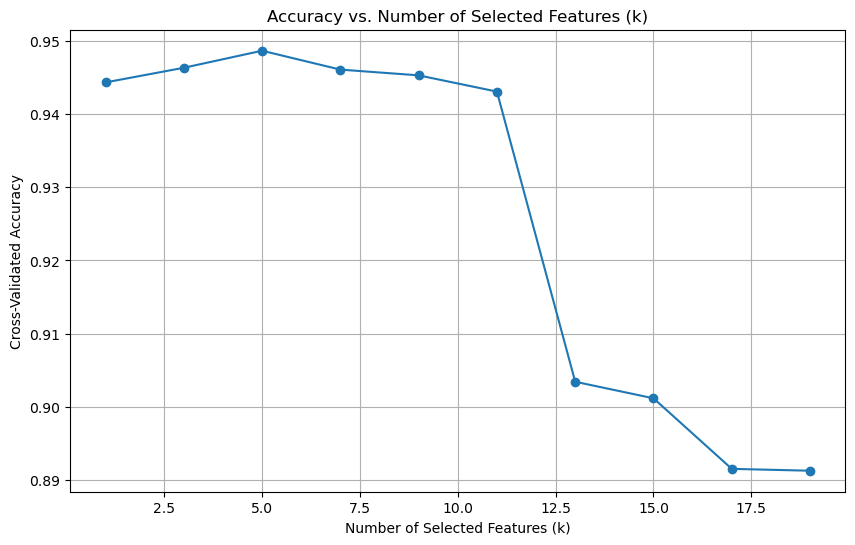

Best k: 5 with Accuracy: 0.9487
Selected Features: Index(['V4', 'V10', 'V11', 'V12', 'V14'], dtype='object')
Test Accuracy: 0.9848976139287351
F1 Score: 0.9910409726651026
Confusion Matrix:
 [[55815   841]
 [   16    74]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9852    0.9924     56656
           1     0.0809    0.8222    0.1473        90

    accuracy                         0.9849     56746
   macro avg     0.5403    0.9037    0.5698     56746
weighted avg     0.9983    0.9849    0.9910     56746



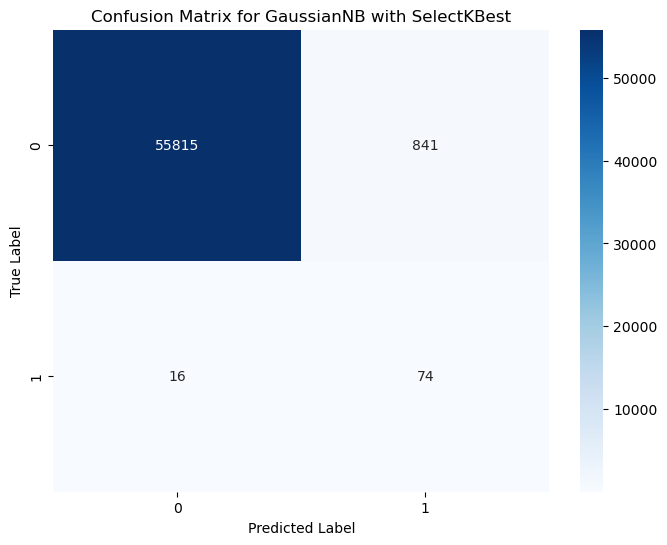

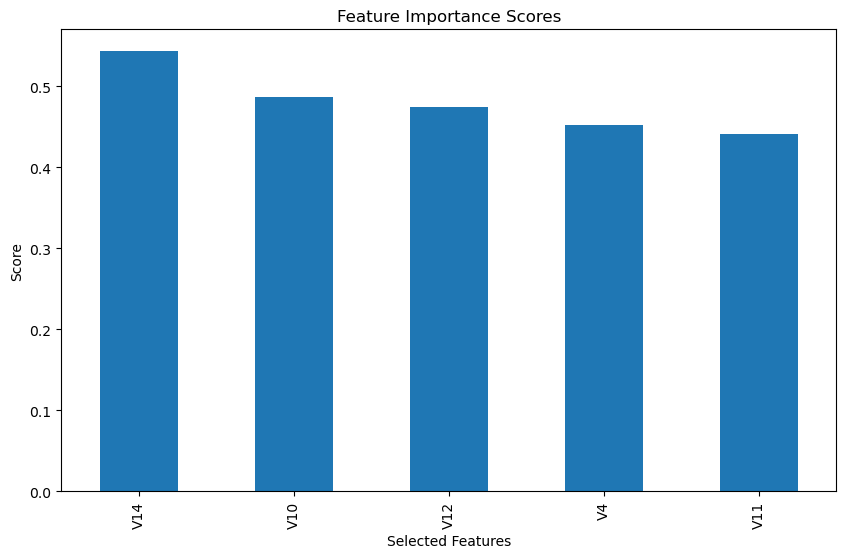

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reduce the range of k values
k_values = range(1, min(X.shape[1], 20), 2)  # Test every 2nd value of k up to 20 or total features

def compute_accuracy(k):
     # Define the pipeline
    pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=k)),
        ('classification', GaussianNB())
    ])
    
    # Cross-validate the pipeline
    cv_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy')  # Use 3-fold CV for speed
    return cv_scores.mean()

accuracy_scores = Parallel(n_jobs=-1)(delayed(compute_accuracy)(k) for k in k_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Accuracy vs. Number of Selected Features (k)")
plt.xlabel("Number of Selected Features (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.grid()
plt.show()

# Find the best k
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"Best k: {best_k} with Accuracy: {best_accuracy:.4f}")

# Refit the pipeline with the best k
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=best_k)),
    ('classification', GaussianNB())
])
pipeline.fit(X_train_resampled, y_train_resampled)

# Get the selected features
selected_features = X_train_resampled.columns[pipeline.named_steps['feature_selection'].get_support()]
print("Selected Features:", selected_features)

# Evaluate on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy and F1 score
accuracy = pipeline.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy:", accuracy)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Plot Confusion Matrix
classes = y_train_resampled.unique()  # Dynamically fetch class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for GaussianNB with SelectKBest")
plt.show()

# Visualize Feature Importance
feature_scores = pipeline.named_steps['feature_selection'].scores_
selected_scores = feature_scores[pipeline.named_steps['feature_selection'].get_support()]
selected_features_scores = pd.Series(selected_scores, index=selected_features)

plt.figure(figsize=(10, 6))
selected_features_scores.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance Scores")
plt.ylabel("Score")
plt.xlabel("Selected Features")
plt.show()


Logistic Regression: 

Accuracy: 0.9976914672399817
F1: 0.9972602176753628
Cross-Validation Accuracy Scores: [0.97723309 0.97786518 0.97932835 0.97733844 0.97800538]
Mean Cross-Validation Accuracy: 0.9779540869365559
Classification Report:
               precision    recall  f1-score   support

           0     0.9984    0.9993    0.9988     56656
           1     0.0000    0.0000    0.0000        90

    accuracy                         0.9977     56746
   macro avg     0.4992    0.4996    0.4994     56746
weighted avg     0.9968    0.9977    0.9973     56746

Confusion Matrix:
 [[56615    41]
 [   90     0]]


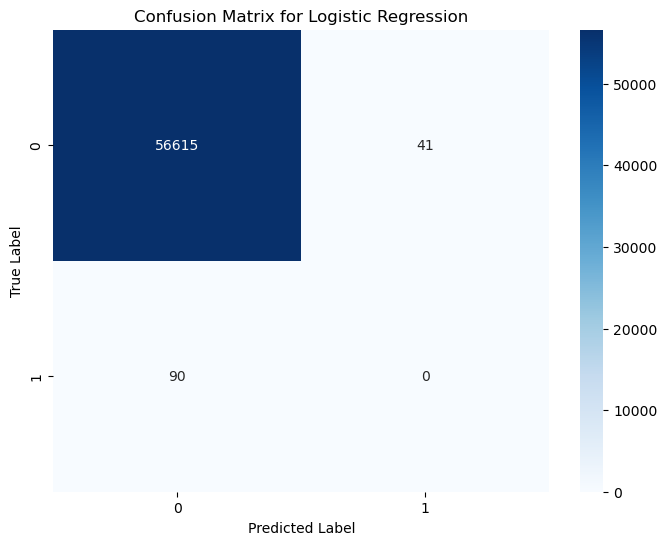

Feature Importance:
 V1        4.955371
V4        3.308191
V11       2.597602
V3        2.025635
V5        1.879011
Amount    0.719459
V19       0.563960
V22       0.540756
V28       0.508750
V27       0.494747
V21       0.402074
V23       0.113798
V24       0.062742
V26      -0.009580
V25      -0.172663
V15      -0.183900
V20      -0.391019
Time     -0.473698
V13      -0.483783
V6       -0.654550
V18      -0.798218
V2       -0.826884
V9       -1.674271
V7       -1.901576
V8       -3.117347
V16      -3.303598
V10      -6.246302
V12      -7.917920
V14      -9.348458
V17      -9.699032
dtype: float64


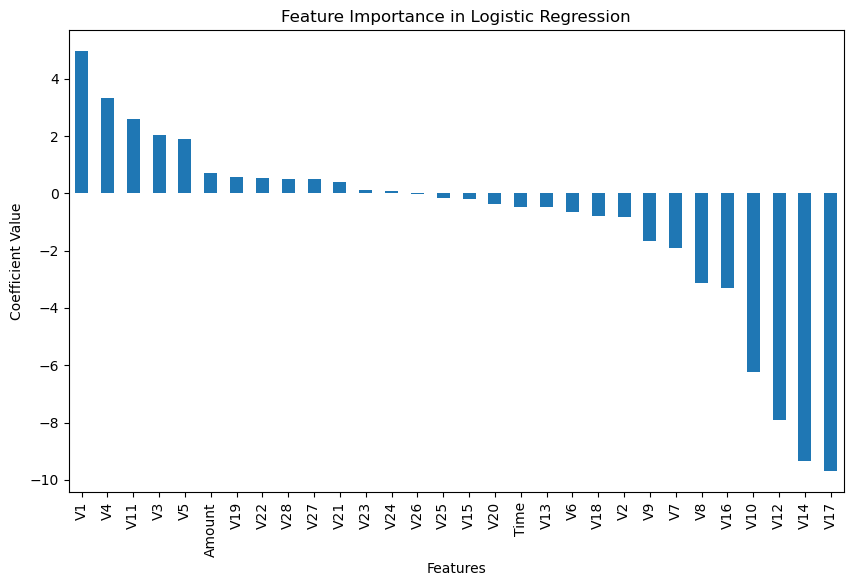

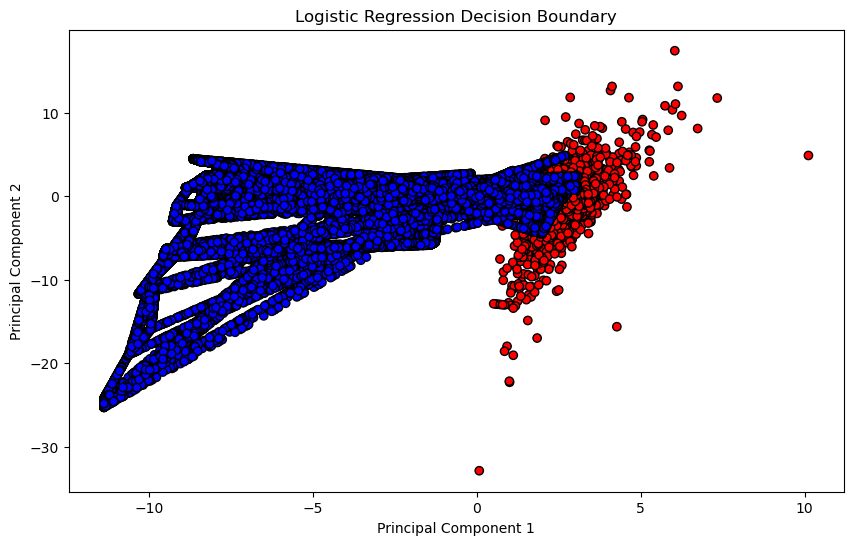

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to retain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_resampled.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train_resampled.columns)

# Create a logistic regression classifier
clf = LogisticRegression(max_iter=3000)

# Train the classifier on the training data
clf.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy and F1 measures
accuracy = clf.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1:", f1)

# Cross-Validation
cv_scores = cross_val_score(clf, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
classes = y_train_resampled.unique()  # Dynamically fetch class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Feature Importance
feature_importance = pd.Series(clf.coef_[0], index=X_train_resampled.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# --- Visualization of Decision Boundary ---
# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test)

# Retrain logistic regression on the 2D reduced data
clf_2d = LogisticRegression(max_iter=1000)
clf_2d.fit(X_train_2d, y_train_resampled)

# Commented out due to memory issues
# # Create a meshgrid for plotting the decision boundary
# x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
# y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
# step_size = 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# # Predict on the meshgrid points
# Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# Plot decision boundary and training data
plt.figure(figsize=(10, 6))
# cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Background colors for decision regions
cmap_points = ListedColormap(['#FF0000', '#0000FF'])      # Colors for data points
# plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_resampled, cmap=cmap_points, edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



Test our best model on data from 2013 to see its performance

In [12]:
file_2013 = ('creditcard_2013.csv')

df_2013 = pds.read_csv(file_2013)

df_2013

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
label_counts_2013 = df_2013['Class'].value_counts()

print(label_counts_2013)

Class
0    284315
1       492
Name: count, dtype: int64


Try 2013 on Decision Tree

In [14]:
# Assuming 'Class' is the target column, drop it to get features
if 'Class' in df_2013.columns:
    X_new = df_2013.drop('Class', axis=1)
    y_new_true = df_2013['Class']
else:
    X_new = df_2013

# Check for feature mismatches
train_features = set(X_train_resampled.columns)
new_features = set(X_new.columns)

missing_features = train_features - new_features
extra_features = new_features - train_features

print("Missing Features:", missing_features)
print("Extra Features:", extra_features)

# Add missing features with default values and drop extra features
for feature in missing_features:
    X_new[feature] = 0

X_new = X_new[X_train_resampled.columns]  # Ensure correct column order

# Predict with the trained model
y_new_pred = best_d_tree.predict(X_new)

# If true labels are available, evaluate performance
if 'Class' in df_2013.columns:
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    print("New Dataset Accuracy:", accuracy_score(y_new_true, y_new_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_new_true, y_new_pred))
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred, digits=4))
else:
    print("Predictions completed. No true labels available for evaluation.")

Missing Features: set()
Extra Features: set()
New Dataset Accuracy: 0.9992942589191979
Confusion Matrix:
 [[284146    169]
 [    32    460]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9994    0.9996    284315
           1     0.7313    0.9350    0.8207       492

    accuracy                         0.9993    284807
   macro avg     0.8656    0.9672    0.9102    284807
weighted avg     0.9994    0.9993    0.9993    284807



Try 2013 on kNN

New Dataset Accuracy: 0.9651132170206491
Confusion Matrix:
 [[274419   9896]
 [    40    452]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9652    0.9822    284315
           1     0.0437    0.9187    0.0834       492

    accuracy                         0.9651    284807
   macro avg     0.5218    0.9419    0.5328    284807
weighted avg     0.9982    0.9651    0.9807    284807



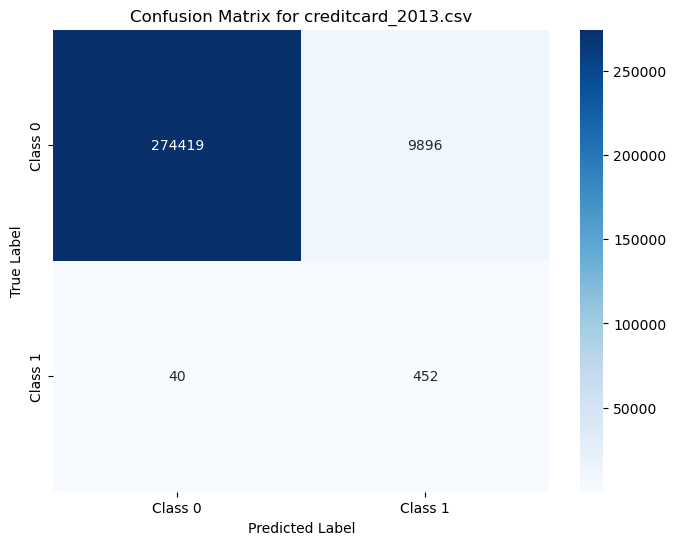

In [15]:
# Standardize the new dataset
X_new_scaled = scaler.transform(X_new)  # Use the scaler fitted on training data

# Convert scaled data back to DataFrame to retain feature names
X_new_scaled = pd.DataFrame(X_new_scaled, columns=X_new.columns)

# Apply PCA to reduce dimensionality
X_new_reduced = pca.transform(X_new_scaled)  # Use the PCA fitted on training data

# Predict with the trained KNN model
y_new_pred = knn.predict(X_new_reduced)

# Evaluate if true labels are available
if 'Class' in df_2013.columns:
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    # Calculate accuracy
    new_accuracy = accuracy_score(y_new_true, y_new_pred)
    print("New Dataset Accuracy:", new_accuracy)

    # Confusion Matrix
    conf_matrix_new = confusion_matrix(y_new_true, y_new_pred)
    print("Confusion Matrix:\n", conf_matrix_new)

    # Classification Report
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred, digits=4))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for creditcard_2013.csv")
    plt.show()
else:
    print("Predictions completed. No true labels available for evaluation.")



2013 on Gaussian Naive Bayes

New Dataset Accuracy: 0.98478969969137
New Dataset F1 Score: 0.9908941587268102
Confusion Matrix:
 [[280050   4265]
 [    67    425]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9850    0.9923    284315
           1     0.0906    0.8638    0.1640       492

    accuracy                         0.9848    284807
   macro avg     0.5452    0.9244    0.5782    284807
weighted avg     0.9982    0.9848    0.9909    284807



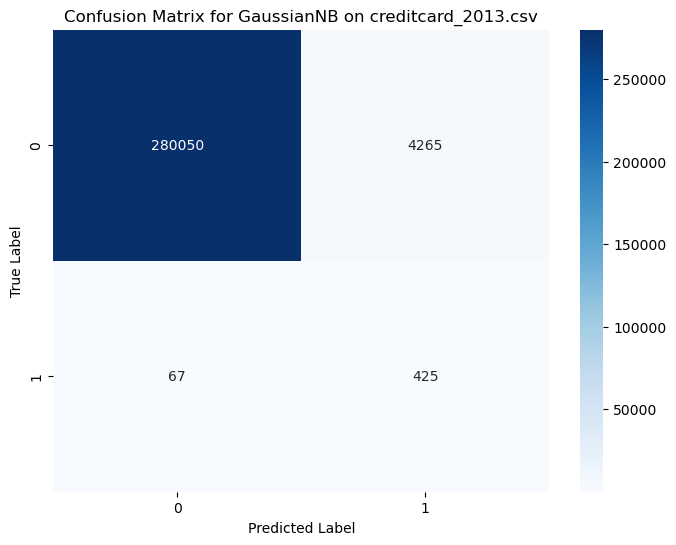

In [16]:
# Use the trained pipeline to select features and predict
# Feature selection is embedded in the pipeline, so just transform and predict
y_new_pred = pipeline.predict(X_new)

# Evaluate the predictions if true labels are available
if 'Class' in df_2013.columns:
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

    # Calculate accuracy and F1 score
    new_accuracy = accuracy_score(y_new_true, y_new_pred)
    new_f1 = f1_score(y_new_true, y_new_pred, average='weighted')
    print("New Dataset Accuracy:", new_accuracy)
    print("New Dataset F1 Score:", new_f1)

    # Confusion Matrix
    conf_matrix_new = confusion_matrix(y_new_true, y_new_pred)
    print("Confusion Matrix:\n", conf_matrix_new)

    # Classification Report
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred, digits=4))

    # Plot Confusion Matrix
    classes = y_train_resampled.unique()  # Dynamically fetch class labels from training data
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for GaussianNB on creditcard_2013.csv")
    plt.show()
else:
    print("Predictions completed. No true labels available for evaluation.")



2013 on Logistic Regression

New Dataset Accuracy: 0.03741481073147781
New Dataset F1 Score: 0.0689173184829493
Confusion Matrix:
 [[ 10164 274151]
 [     0    492]]
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.0357    0.0690    284315
           1     0.0018    1.0000    0.0036       492

    accuracy                         0.0374    284807
   macro avg     0.5009    0.5179    0.0363    284807
weighted avg     0.9983    0.0374    0.0689    284807



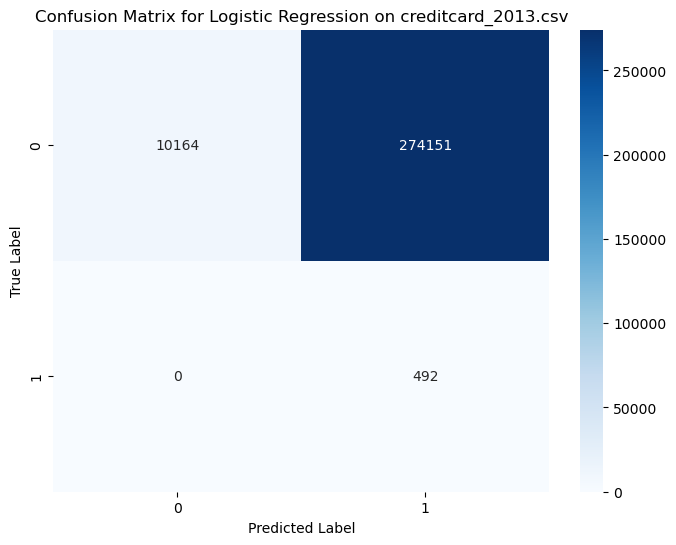

In [17]:
# Standardize the new dataset
X_new_scaled = scaler.fit_transform(X_new)  # Use the scaler fitted on training data

# Convert scaled data back to DataFrame to retain feature names
X_new_scaled = pd.DataFrame(X_new_scaled, columns=X_new.columns)

# Predict with the trained Logistic Regression model
y_new_pred = clf.predict(X_new_scaled)

# Evaluate the predictions if true labels are available
if 'Class' in df_2013.columns:
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

    # Calculate accuracy and F1 score
    new_accuracy = accuracy_score(y_new_true, y_new_pred)
    new_f1 = f1_score(y_new_true, y_new_pred, average='weighted')
    print("New Dataset Accuracy:", new_accuracy)
    print("New Dataset F1 Score:", new_f1)

    # Confusion Matrix
    conf_matrix_new = confusion_matrix(y_new_true, y_new_pred)
    print("Confusion Matrix:\n", conf_matrix_new)

    # Classification Report
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred, digits=4))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", 
                xticklabels=np.unique(y_train_resampled), yticklabels=np.unique(y_train_resampled))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for Logistic Regression on creditcard_2013.csv")
    plt.show()
else:
    print("Predictions completed. No true labels available for evaluation.")
